# Stimulus-based root cause analysis for NFV environment 

### Helper functions

In [6]:
import sys, re
import matplotlib.pyplot as plt

In [7]:
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv"):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[1])
    
    return list(map(lambda x:float(x), stat[:-1]))

In [8]:
def plot_stat(stat_name, ax, source):
    stat = get_stat(stat_name, source)
    ax.plot(stat)
    ax.set_title(stat_name)

In [9]:
def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv"):
    i = 1
    fig, ax = plt.subplots(len(stat_names),1)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source)
        i+=1
    fig.tight_layout()
    

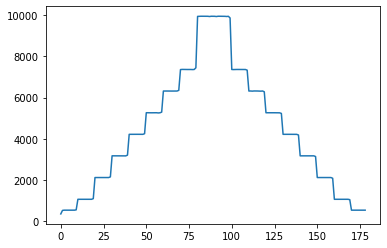

In [53]:
with open("data_collection/tx_stats.csv") as file:
    next(file)
    tmp = []
    for line in file:
        tmp.append(float(line.strip().split(",")[5]))
        
plt.plot(tmp)

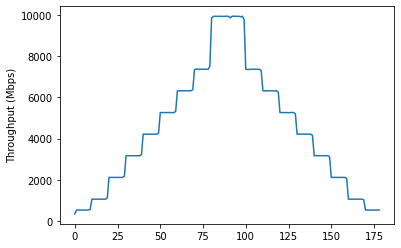

In [54]:
with open("data_collection/rx_stats.csv") as file:
    next(file)
    tmp = []
    for line in file:
        tmp.append(float(line.strip().split(",")[5]))

plt.ylabel("Throughput (Mbps)")
plt.plot(tmp)

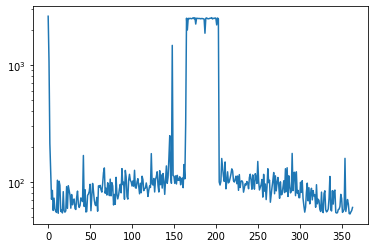

In [55]:
with open("data_collection/latency.csv") as file:
    tmp = []
    for line in file:
        tmp.append(float(line.strip())/100)

plt.yscale("log")
plt.plot(tmp)

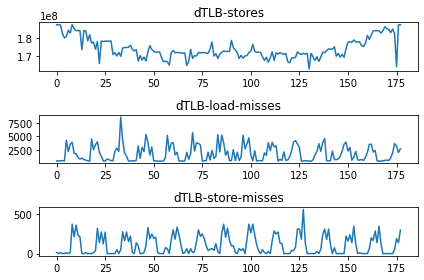

In [56]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"],"./data_collection/onvm_bridge.csv")

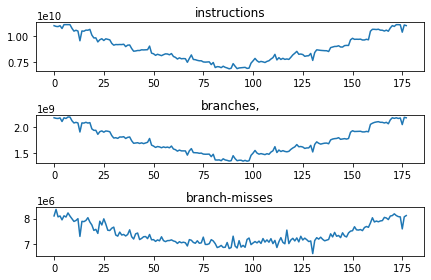

In [57]:
plot_stats(["instructions", "branches,", "branch-misses"], "./data_collection/onvm_bridge.csv")

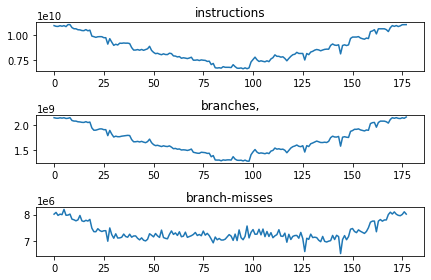

In [58]:
plot_stats(["instructions", "branches,", "branch-misses"], "./data_collection/onvm_ndpi.csv")

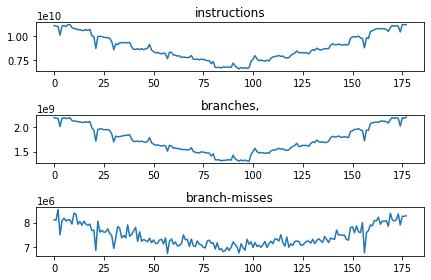

In [59]:
plot_stats(["instructions", "branches,", "branch-misses"], "./data_collection/onvm_firewall.csv")

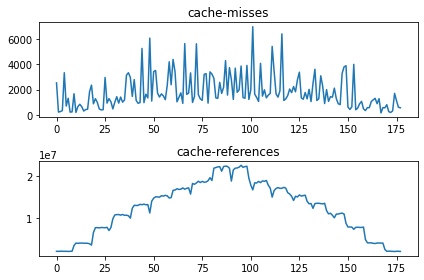

In [60]:
plot_stats(["cache-misses", "cache-references"], "./data_collection/onvm_bridge.csv")

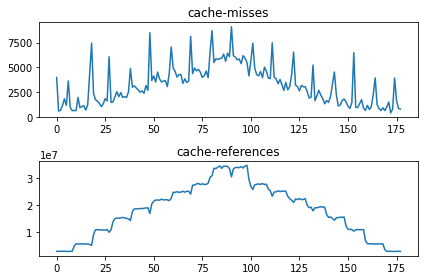

In [61]:
plot_stats(["cache-misses", "cache-references"], "./data_collection/onvm_ndpi.csv")

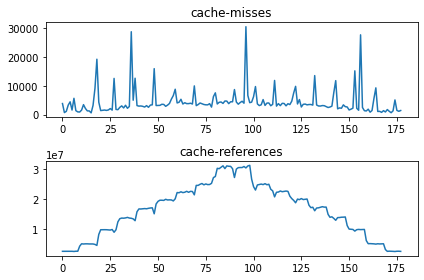

In [62]:
plot_stats(["cache-misses", "cache-references"], "./data_collection/onvm_firewall.csv")

# Testbed setup (Freisa server)
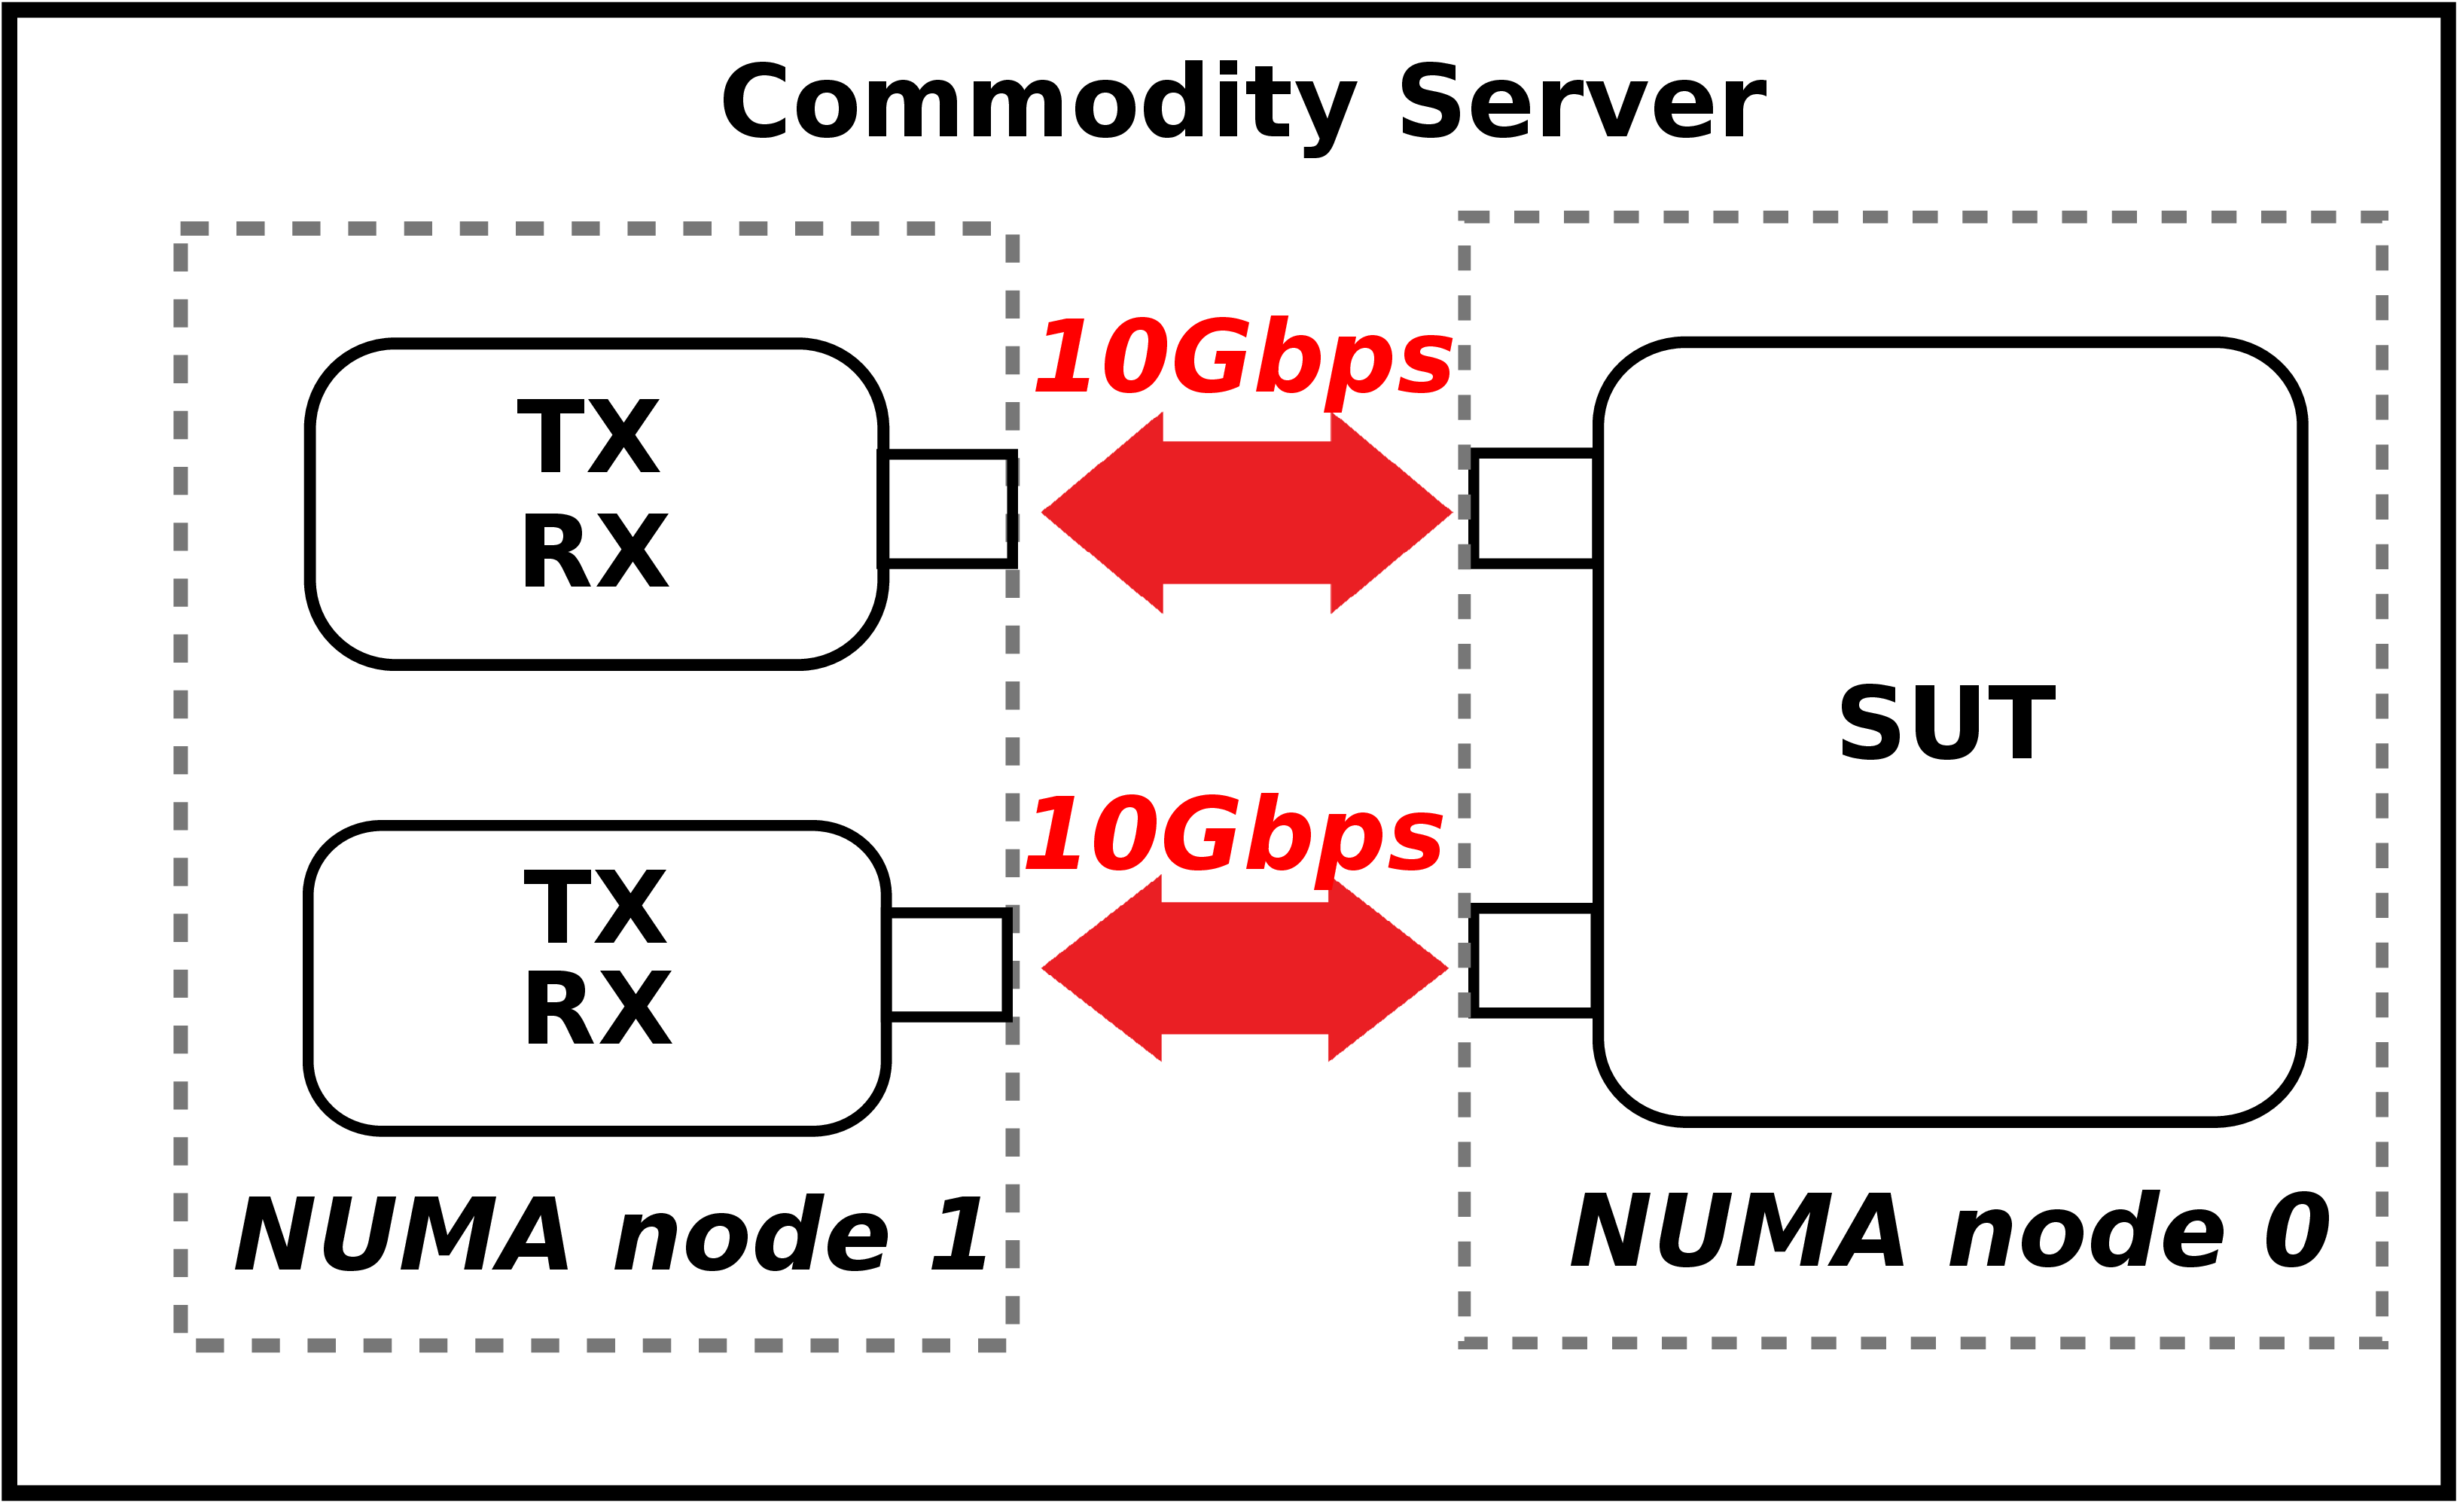

# Switch experiments
### A single instance of FastClick for traffic forwarding

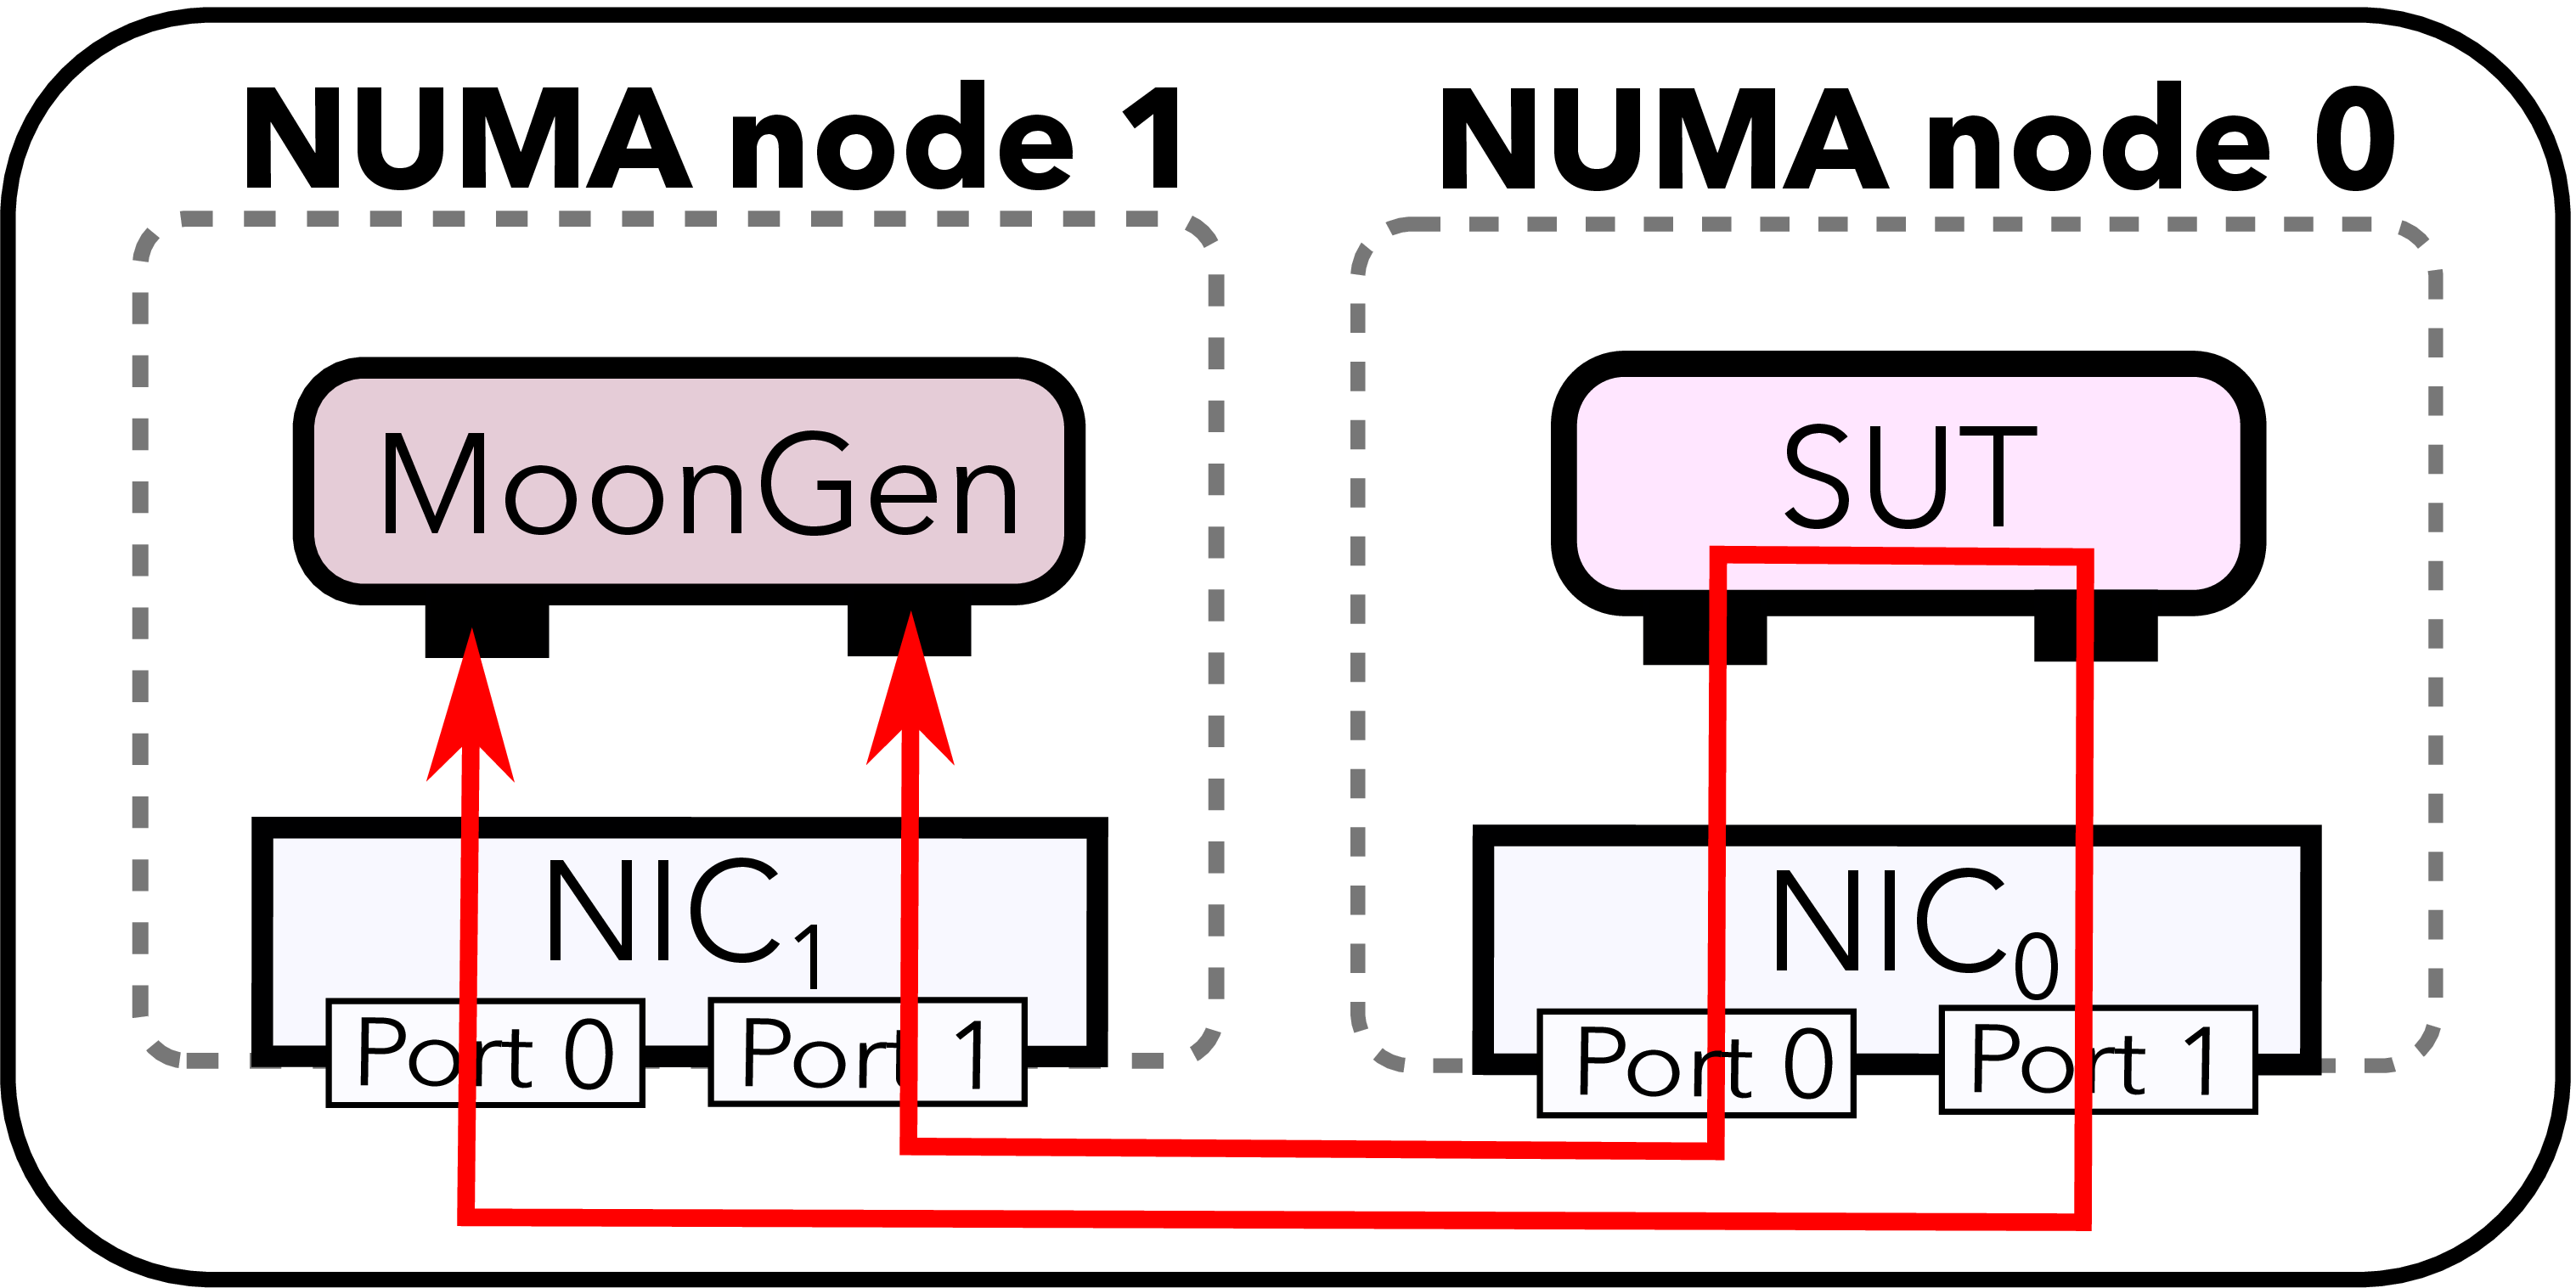

## Off-On-Off experiment @ 5 Gbps
#### Instructions and branch features

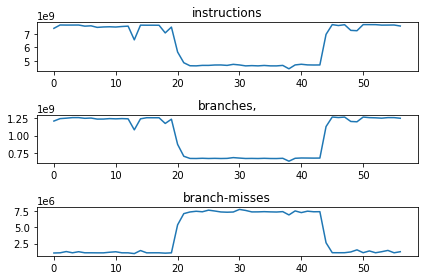

In [6]:
plot_stats(["instructions", "branches,", "branch-misses"], "general/fastclick-on-off.csv")

### Cache features in general

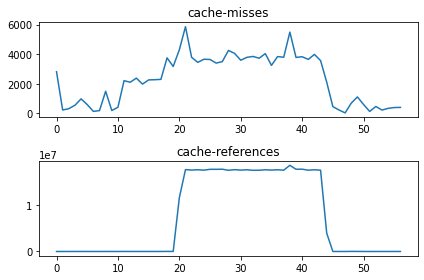

In [7]:
plot_stats(["cache-misses", "cache-references"], "general/fastclick-on-off.csv")

#### L1 data cache features

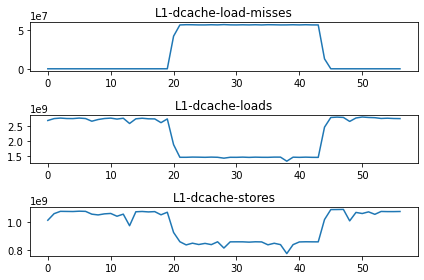

In [8]:
plot_stats(["L1-dcache-load-misses", "L1-dcache-loads", "L1-dcache-stores"], "general/fastclick-on-off.csv")

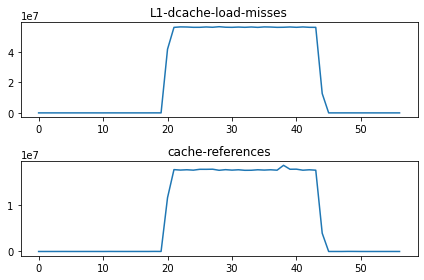

In [9]:
plot_stats(["L1-dcache-load-misses", "cache-references"], "general/fastclick-on-off.csv")

### TLB features

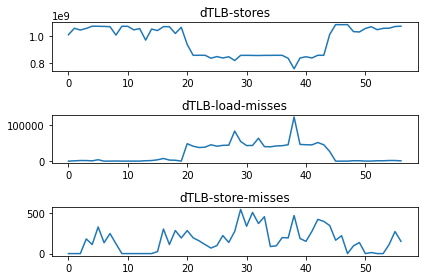

In [10]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "general/fastclick-on-off.csv")

#### Last-Level Cache features

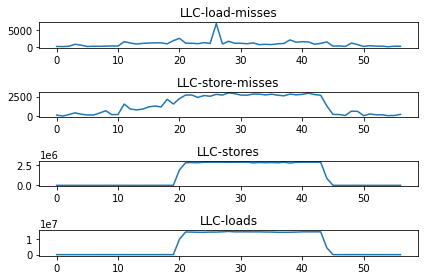

In [12]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "general/fastclick-on-off.csv")

## Experiment with varied CBR 64B traffic
#### Change the input traffic rate every 10 seconds: {0.74, 3.72, 7.44, 11.16, 14.88, 11.16, 7.44, 3.72, 0.74} Mpps

FileNotFoundError: [Errno 2] No such file or directory: 'fastclick-varied-cbr-rates.csv'

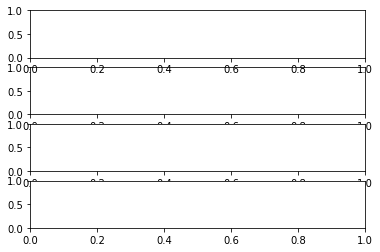

In [15]:
plot_stats(["instructions", "branches,", "branch-misses", "branch-load-misses"])

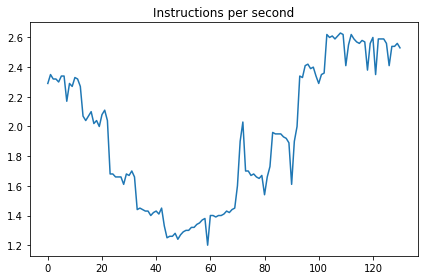

In [17]:
stat = []
with open("general/fastclick-varied-cbr-rates.csv") as file:
    for line in file:
        if re.search("insn per", line):
            stat.append(line.strip().split(',')[-2])
  
fig, ax = plt.subplots(1,1)
ax.plot(list(map(lambda x:float(x), stat[:-1])))
plt.title("Instructions per second")
fig.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'fastclick-varied-cbr-rates.csv'

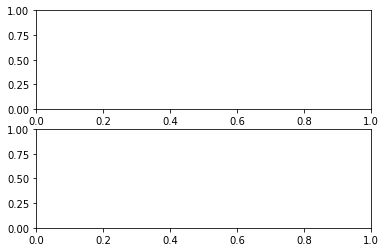

In [18]:
plot_stats(["cache-misses", "cache-references"])

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses"])

In [ ]:
plot_stats(["L1-dcache-load-misses", "L1-dcache-loads", "L1-dcache-stores"])

# Imix traffic with varied injection rates

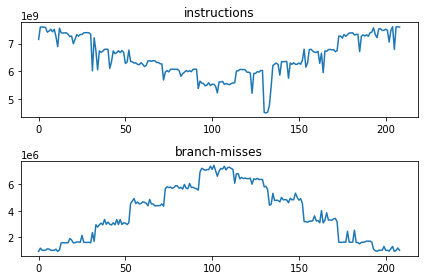

In [19]:
plot_stats(["instructions", "branch-misses"], "general/fastclick-varied-imix-rates.csv")

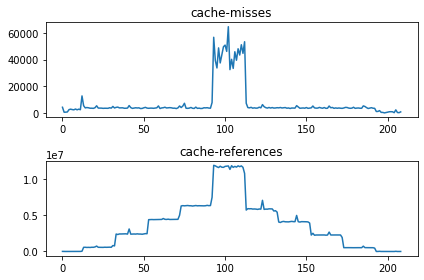

In [20]:
plot_stats(["cache-misses", "cache-references"], "general/fastclick-varied-imix-rates.csv")

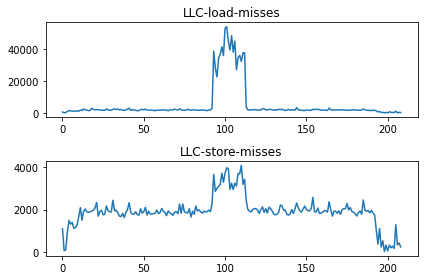

In [21]:
plot_stats(["LLC-load-misses", "LLC-store-misses"], "general/fastclick-varied-imix-rates.csv")

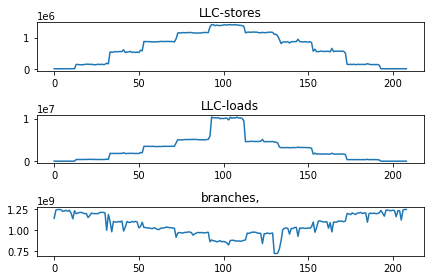

In [22]:
plot_stats(["LLC-stores", "LLC-loads", "branches,"], "general/fastclick-varied-imix-rates.csv")

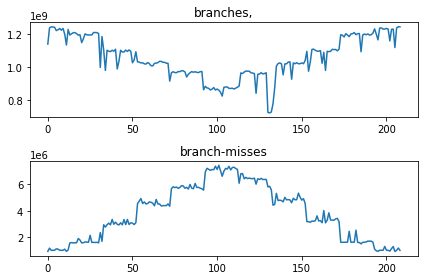

In [23]:
plot_stats(["branches,", "branch-misses"], "general/fastclick-varied-imix-rates.csv")

# l2fwd: Use the DPDK l2fwd application as the sample function 

## Service function chaining 
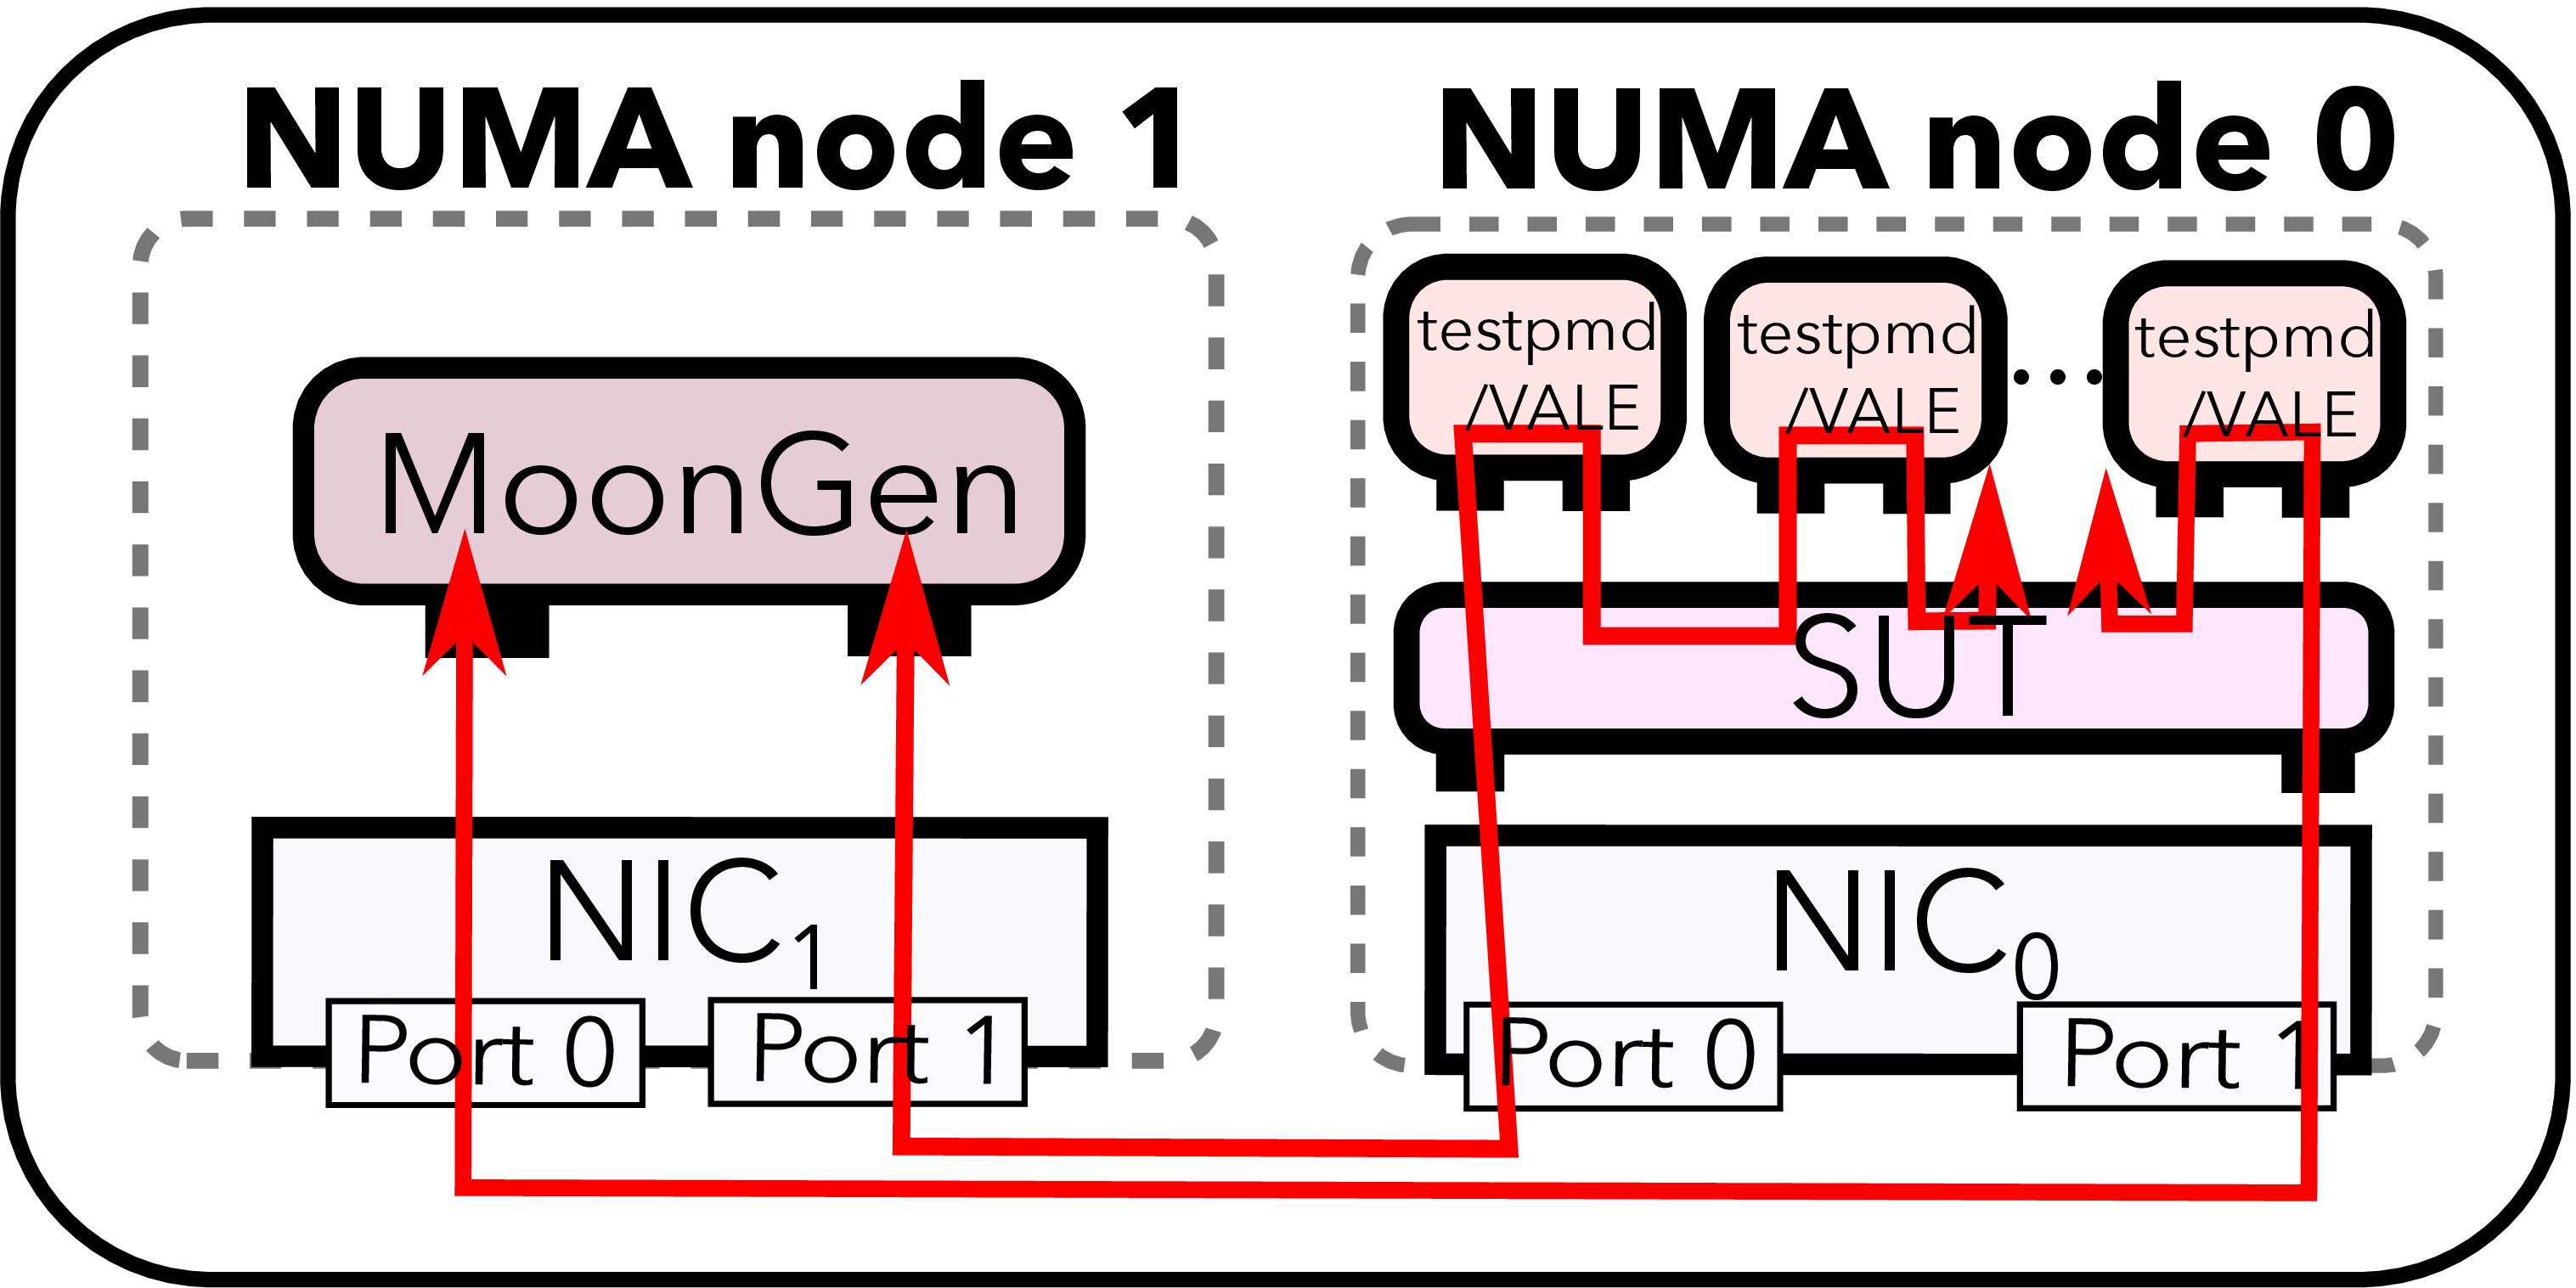

### Off-on-off experiment

In [ ]:
plot_stats(["instructions", "branches,"], "l2fwd-cbr.csv")

In [ ]:
plot_stats(["LLC-stores", "LLC-loads",], "l2fwd-cbr.csv")

In [ ]:
plot_stats(["cache-misses", "L1-dcache-loads", "L1-dcache-stores"], "l2fwd-cbr.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-cbr.csv")

### Stress testing the l2fwd 
####  During the normal execution, injecting computation-intensive task at the same worker core. 
#### Command: taskset -c 5 stress --cpu 10

In [ ]:
plot_stats(["instructions", "branches,"], "l2fwd-stress.csv")

In [ ]:
plot_stats(["cache-misses", "cache-references"], "l2fwd-stress.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores"], "l2fwd-stress.csv")

In [ ]:
plot_stats(["L1-dcache-load-misses", "cache-references"], "l2fwd-stress.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-stress.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l2fwd-stress.csv")

## Three stimulus scenarios
1. Negative resource stimulus: an abnormally low resource consumption level given the application load
2. Positive resource stimulus: an abnormally high resource consumption given the application load
3. Load stimulus (positive) consists in creating resource insufficiency by increasing the application load.

### System setting:
Data path: a 2-VNF service function chain (l2fwd+l3fwd). Both VNFs have been containeriazed using Docker. 

Traffic generator and monitor: MoonGen. 

SUT: FastClick (a modular, high-speed software virtual switch)

#### Positive Resource: 
Imposing a computation-intensive process to the worker core of the l2fwd VNF.  
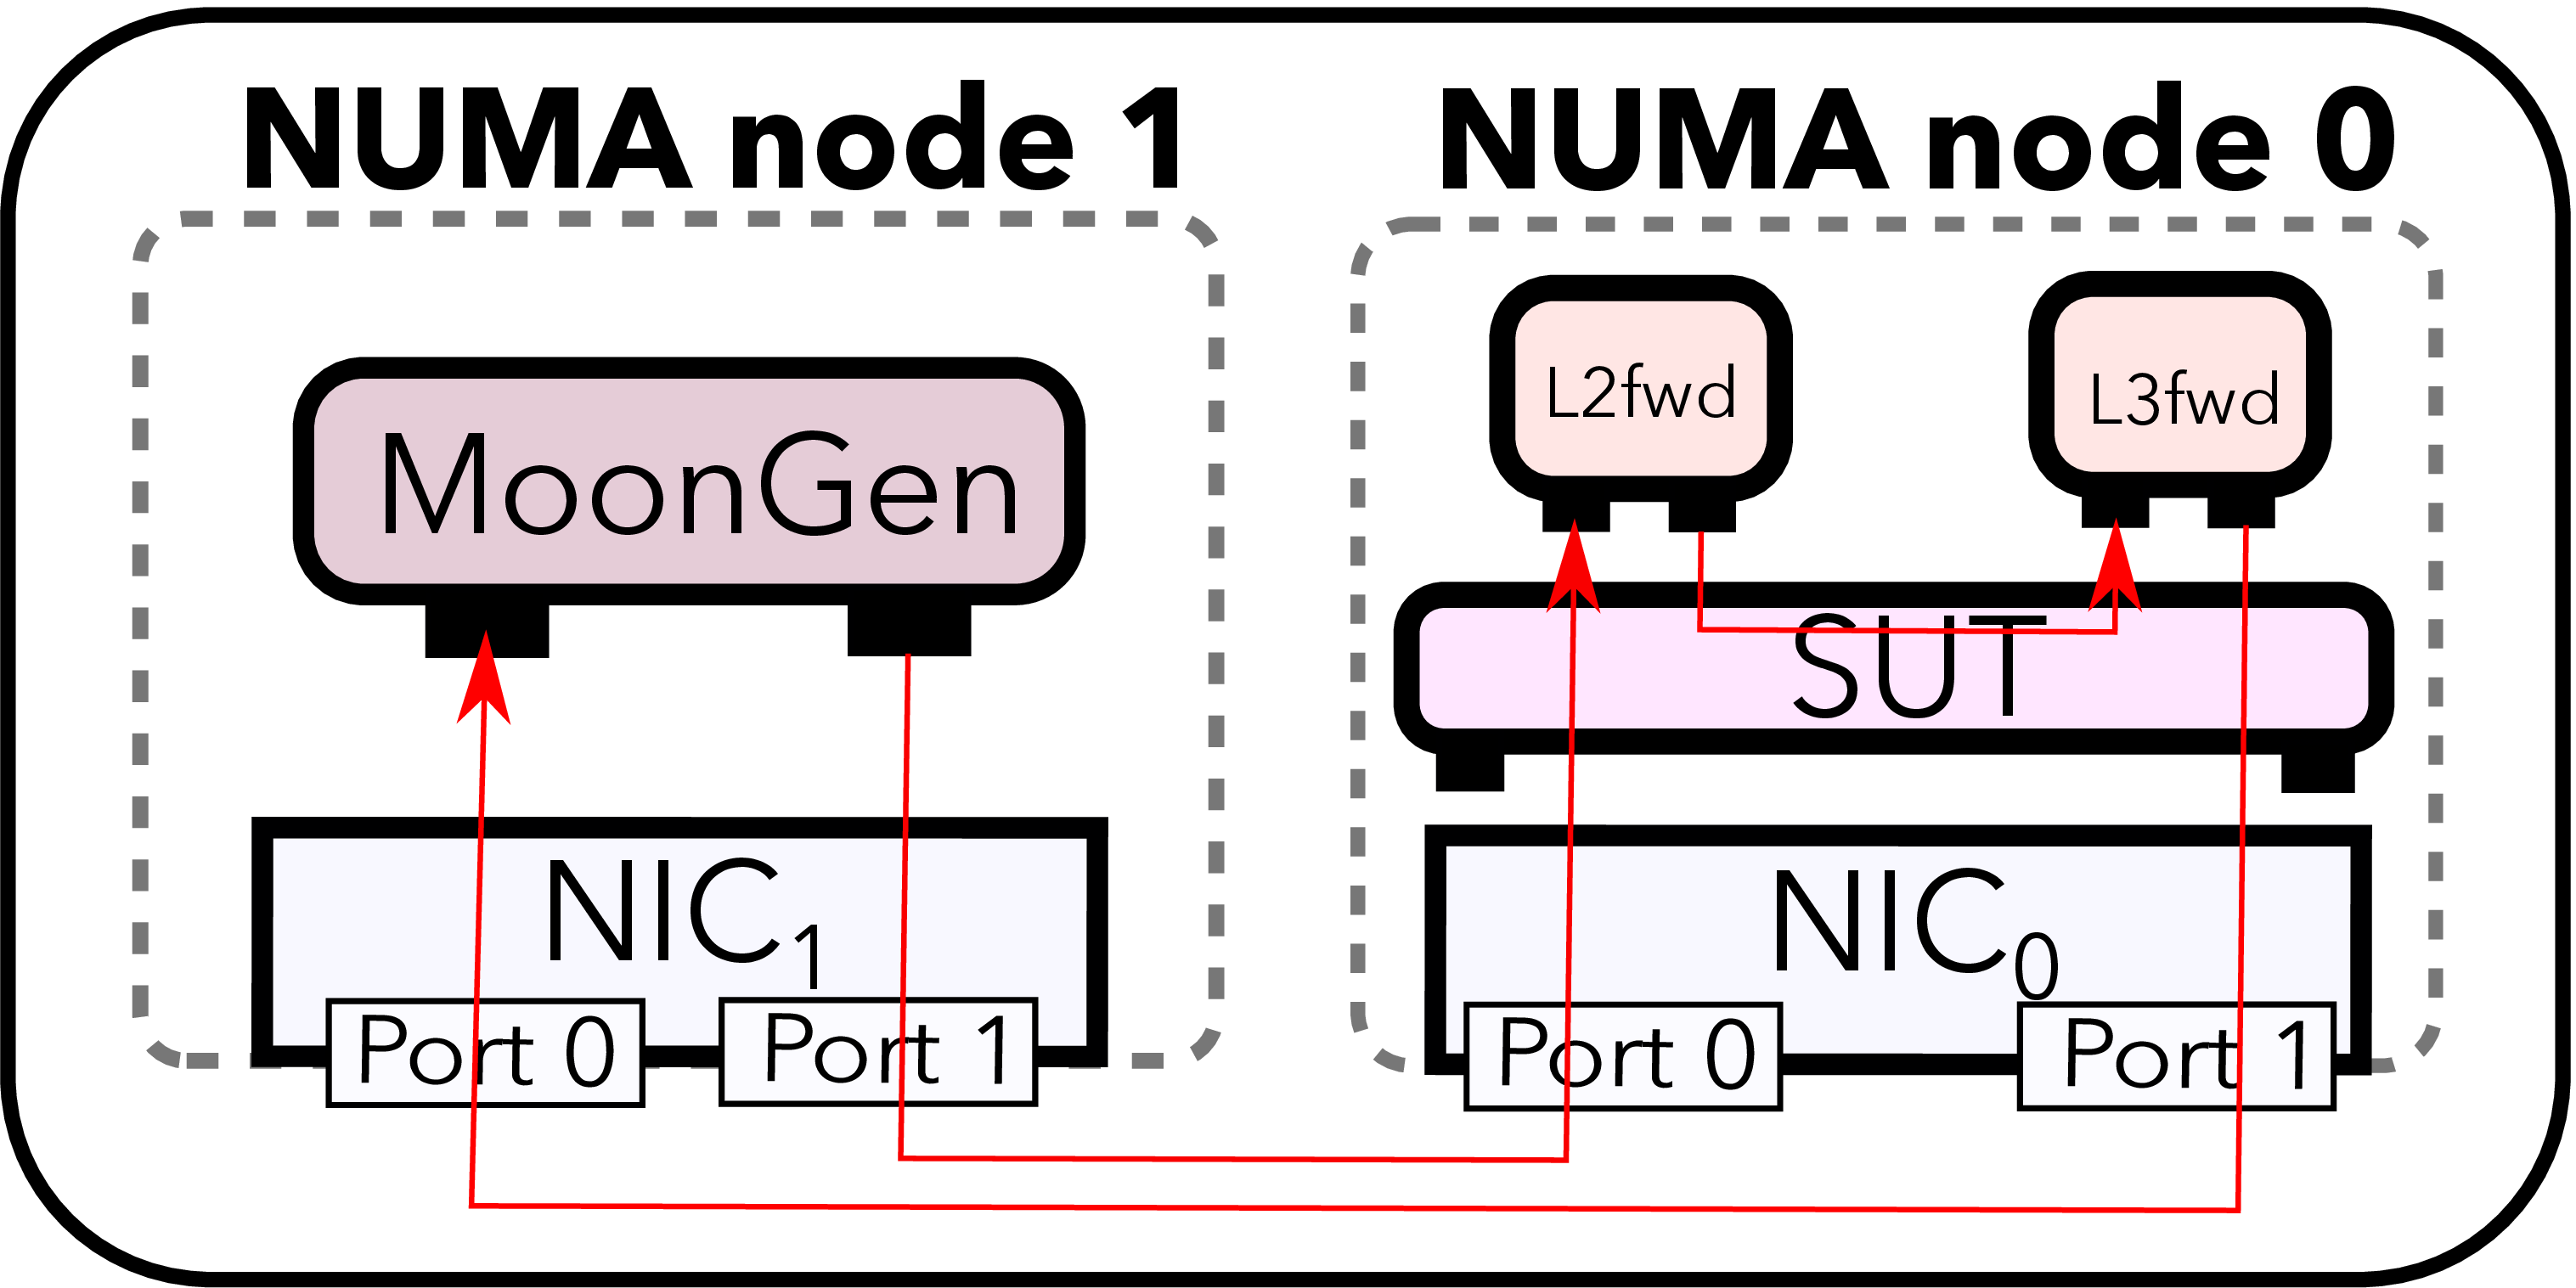

### Instructions, branches, and branch misses for FastClick, l2fwd, and l3fwd

In [ ]:
plot_stats(["instructions", "branches,", "branch-misses"], "fastclick-positive-resource.csv")

In [ ]:
plot_stats(["instructions", "branches,", "branch-misses"], "l2fwd-positive-resource.csv")

In [ ]:
plot_stats(["instructions", "branches,", "branch-misses"], "l3fwd-positive-resource.csv")

### Cache features for FastClick, L2fwd, and L3fwd

In [ ]:
plot_stats(["cache-misses", "cache-references"], "fastclick-positive-resource.csv")

In [ ]:
plot_stats(["cache-misses", "cache-references"], "l2fwd-positive-resource.csv")

In [ ]:
plot_stats(["cache-misses", "cache-references"], "l3fwd-positive-resource.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "fastclick-positive-resource.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-positive-resource.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l3fwd-positive-resource.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores", "L1-icache-load-misses"], "fastclick-positive-resource.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores", "L1-icache-load-misses"], "l2fwd-positive-resource.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores", "L1-icache-load-misses"], "l3fwd-positive-resource.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "fastclick-positive-resource.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l2fwd-positive-resource.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l3fwd-positive-resource.csv")

### Negative resource stimulus
TBD: downclock the CPU frequency of the worker cores to create this stimulus. 

Note: There is an issue for the Intel pstate CPU scaling governor. We need to reload the old driver to enable flexible frequency resetting. As the server needs to be restarted to do this, I propose that we postpone this set of experiments to the last. 

### Load stimulus
We vary the input rate to observe the trends of the low-level features. 

Input rates: {2, 4, 6, 8, 10} Gbps, step interval: 10s

In [ ]:
plot_stats(["instructions", "branches,",  "branch-misses", ], "fastclick-load.csv")

In [ ]:
plot_stats(["instructions", "branches,",  "branch-misses",], "l2fwd-load.csv")

In [ ]:
plot_stats(["instructions", "branches,", "branch-misses",], "l3fwd-load.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores"], "fastclick-load.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores"], "l2fwd-load.csv")

In [ ]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores"], "l3fwd-load.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "fastclick-load.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-load.csv")

In [ ]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l3fwd-load.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "fastclick-load.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l2fwd-load.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "general/l3fwd-load.csv")

# OpenNetVM

ValueError: could not convert string to float: '<not counted>'

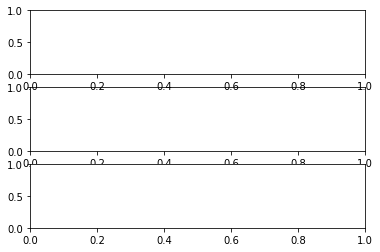

In [24]:
plot_stats(["instructions", "branches,", "branch-misses"], "./opennetvm/bridge-imix-varied-rates.csv")

In [ ]:
plot_stats(["LLC-load-misses", "LLC-store-misses"], "./opennetvm/bridge-imix-varied-rates.csv")

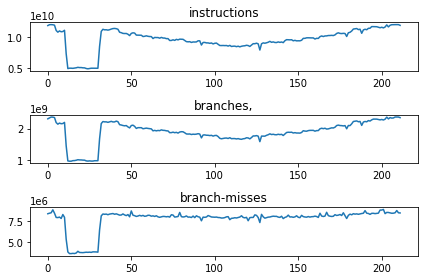

In [25]:
plot_stats(["instructions", "branches,", "branch-misses"], "./data_collection/onvm_bridge.csv")

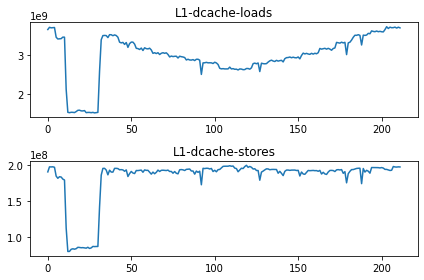

In [26]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores"], "./data_collection/onvm_bridge.csv")

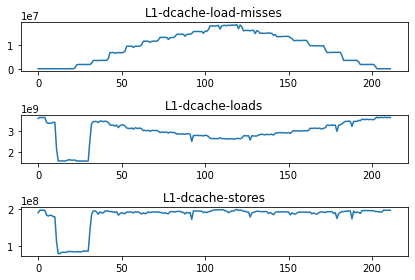

In [13]:
plot_stats(["L1-dcache-load-misses", "L1-dcache-loads", "L1-dcache-stores"], "./data_collection/onvm_bridge.csv")

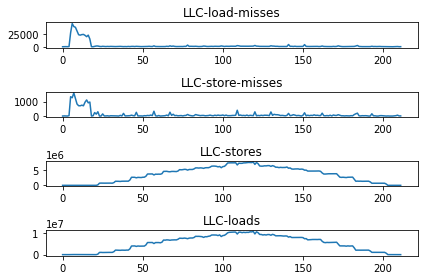

In [14]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "./data_collection/onvm_bridge.csv")

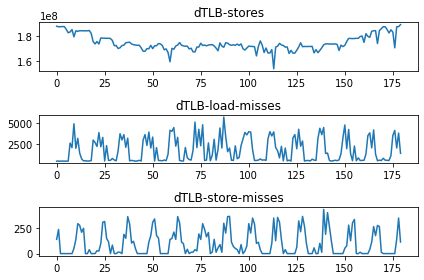

In [14]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"],"./data_collection/onvm_bridge.csv")